# EXPLORING THE LINKS BETWEEN ECONOMIC AND POLITICAL FACTORS AND GLOBAL MORTALITY PATTERNS USING UNSUPERVISED LEARNING(SVD,MATRIX COMPLETION,K-MEANS,HIERARCHIAL CLUSTERING) 

# 🌍 Can We Predict Global Health Patterns with Math? Let’s Find Out.
### 
Hey there! 👋

Ever wondered if we can use data science to understand how countries deal with health problems-like which ones are doing well, which are struggling, and what role things like money or corruption play?

Well, that’s exactly what we tried to do using a few math tools (don’t worry, we’ll keep it simple)-and we learned some pretty interesting stuff and we will definetly will make you understand also.

# INTRODUCTION 

Health outcomes around the world are influenced by a mix of disease prevalence, political integrity, and financial investment. In this project, we explore the intersection of three domains:

1. Disease-specific mortality rates

2. Public health spending as a percentage of GDP

3. Political corruption index scores (0 = least corrupt, 1= most corrupt)

Our goal is to analyze how these variables interact across countries and years, using unsupervised learning methods like Principal Component Analysis (PCA) and clustering (KMeans). We ask:

1. Can we reduce the dimensionality of this dataset without losing its meaning?

2. Do countries cluster naturally based on these indicators?

3. What patterns or trends emerge from this decomposition?

The data comes from three sources:

1. IHME Global Burden of Disease (GBD): Mortality rates by cause

2. Our World in Data: Health expenditure (% GDP)

3. Our World in Data: Political corruption index

# THEORETICAL BACKGROUND 

## Principal component analysis(PCA)
 
PCA is a method for reducing the dimensionality of data by transforming it into a set of orthogonal components that capture the most variance. It is used for:

Identifying dominant trends in the data

Removing redundancy

Preparing data for visualization or clustering

Key concepts:

Components are uncorrelated linear combinations of original features

Scaling is important for fair component calculation

Use of scree plots helps in choosing the optimal number of components

## Singular Value Decomposition (SVD)

SVD is a matrix factorization technique that expresses a data matrix as the product of three matrices: U, Σ, and V*. It is closely related to PCA and offers:

Decomposition of data into orthogonal modes

Insight into row-wise (U) and column-wise (V*) structure

Flexible reconstruction based on retained singular values

SVD is often used when working directly with the raw matrix instead of its covariance form (as in PCA).

## KMeans 

KMeans is a partitioning method that separates data into k clusters by minimizing within-cluster variance.

Key points:

Sensitive to initialization and choice of k

Works well on reduced-dimensional space (like PCA output)

Good for quick, interpretable groupings

Hierarchical Clustering

This method builds a tree (dendrogram) of clusters either bottom-up (agglomerative) or top-down (divisive).

### Key features:

No need to predefine number of clusters

Can visualize nested grouping structure

Can use various linkage criteria (single, complete, average)

### Evaluation Tools

Scree plot: Visualizing variance explained

Reconstruction error plot: For SVD rank selection

2D scatter plots: PCA projections colored by clusters

Dendrograms: For hierarchical clustering

# METHODOLOGY 

### Cleaning Up the Data ( Making It Actually Usable)

Before jumping into the fun stuff like SVD and clustering, we had to do some serious cleanup. You know how data in the real world is never quite plug-and-play? Yeah, this was one of those cases.

Here’s what we had to do to get the datasets ready to talk to each other:

 Step 1: Speak the Same Language (Standardizing Country Names)
The corruption dataset was messy — some countries didn’t have proper 3-letter codes (like “USA” or “IND”). Instead, it had full names or even regions like “Europe” or “Africa.”
So we fixed that by:

Matching names to official 3-letter ISO codes using the pycountry library
Manually patching the tricky cases (because pycountry isn’t a mind-reader)
Filtering out any countries that didn’t appear in our other datasets (sorry, Oldenburg)

Step 2: Merging GDP and Politics
Next, we took two of our key ingredients — GDP health spending and corruption index — and merged them together based on country code and year.
We kept only the years 2010 to 2021 to make sure the data was recent and complete. Then we dropped duplicate labels like “Entity_x” and “Entity_y” and gave things cleaner names.

Step 3: Matching Health Data with Country Codes
Our main dataset on disease-related deaths (from IHME) used full country names — which didn’t match the GDP/corruption files.
To fix that, we:

Pulled all the country names from IHME
Matched them to their ISO codes (again using pycountry)
Kept only the countries that overlapped with our GDP-corruption data
Now everything could finally be joined together neatly.

 Step 4: The Big Merge
Once we had cleaned versions of all three datasets (deaths, money, and politics), we merged them on country code and year. The result was a beautiful, unified table that told us:

What people were dying from
How much their country was spending on health
How corrupt their government was (according to the index)


 Step 5: Final Touches
To prep the data for SVD:

We filtered only for “All ages” and “Both sex” to avoid duplication
We used only percentages of deaths (not raw numbers or rates)
We pivoted the table so each cause of death became its own column
Finally, we standardized all numeric values using z-score scaling (because PCA is picky about scales)

### Dimensionality Reduction with SVD / PCA

Used Singular Value Decomposition (SVD) to reduce dimensionality.
Scree plot showed that ~6 components captured over 85% of the variance, allowing us to compress the dataset significantly.
Interpreted the latent components (e.g., some components captured patterns related to wealth, chronic illness, or governance).
Clustering

### KMeans Clustering (k=4):
Applied to the PCA-reduced data to group similar country-years.
Resulting clusters showed clear patterns:
High corruption + low spending
Low corruption + high spending
Transitional health systems
Chronic disease-heavy wealthy countries
### Hierarchical Clustering

Used Agglomerative Clustering with several linkage methods:
Ward: Best separation with 4 interpretable groups.
Average, Complete, Centroid, Single: Explored for comparison.
Visualized using dendrograms, and analyzed clusters by political corruption and health spending distributions.

# RESULTS & DISCUSSION

### SVD Explained Variance

The SVD cumulative explained variance plot tells us about the proportion of data structure that we can explain by keeping just a small number of components. The shape of this plot matters: it tells us how quickly we can represent our data.

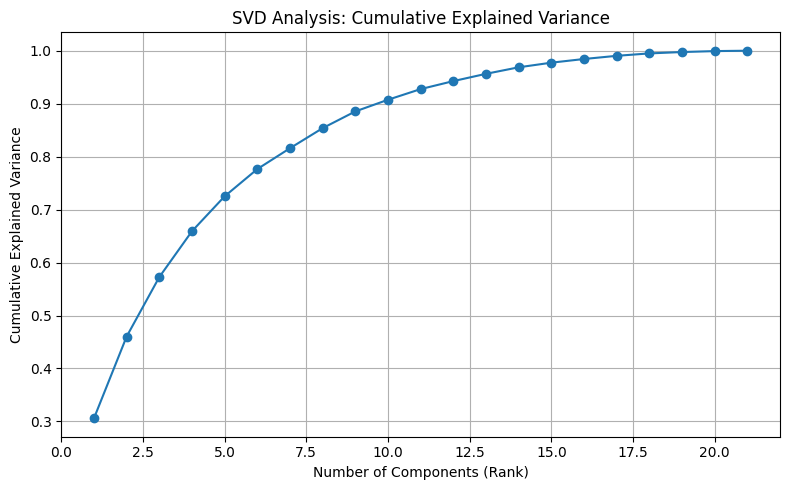

*Elbow Point:-*

There's a noticeable "elbow" or inflection point around rank 6-8. Using ranks in the range of 6-10 is likely optimal for balancing performance and complexity.

Already, at 6 components, we are explaining virtually 85% of the variance.At 10 components, we are more than 90%.


This tells us that while we began with over 100 health and governance-related features, the core structure of the dataset is driven by fewer hidden  patterns. The shape of the curve-steep at first and leveling off-confirms that most variance can be compressed into a small number of key directions.

This decomposition is ideal for both dimensionality reduction and noise removal. The "elbow" in the curve around 6 components served as a practical cutoff for further analysis and reconstruction. This is consistent with intuition in the real world: most health and economic outcomes are likely to co-occur in worldwide trends. For example, low GDP and high corruption tend to coincide with high infectious disease rates.


### Reconstruction Error (SVD)

This graph shows how well we can recover the original dataset with a small number of SVD components. As rank increases, the mean squared error drops precipitously and then begins to plateau:
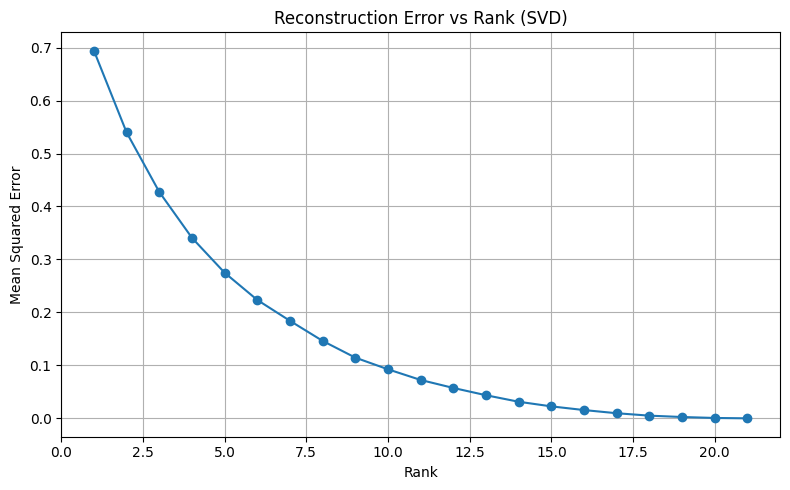

At rank 6, reconstruction is already fairly close.

Moving beyond rank 10 adds very little value-the classic sign of diminishing returns.

Why it matters: it demonstrates that most of the health, economic, and political structure across countries can be accounted for by a number of underlying themes. These themes are what PCA and SVD components help us reveal.


### Matrix Completion with SVD

We were interested to know if SVD could also handle missing values. So we carried out matrix completion with three levels of missingness: 10%, 20%, and 30%.
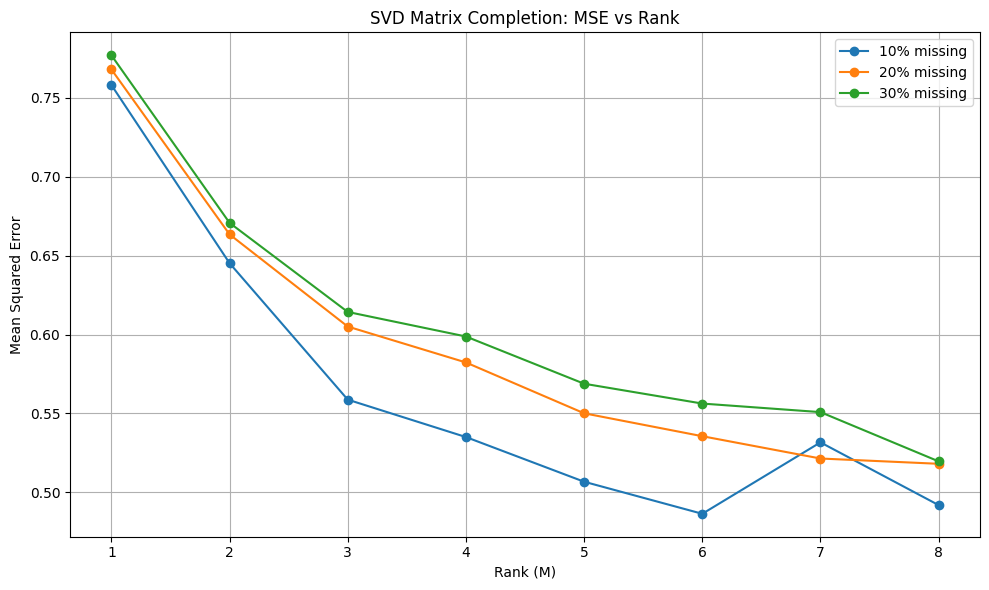

The results:

There is a drastic fall in errors with an increase in rank, especially in 10% missing.

The performance remains flat even below 30% missing after rank 6.

The U matrix (left singular vectors) tells us how individual observations (e.g.,countries or country-years) align with each latent pattern or component. For example, some countries load heavily onto components representing high chronic disease burdens or high corruption.

The V* matrix (right singular vectors) indicates how each original variable-causes of death, spending, corruption-contributes to those latent components. High weights in V* identify which variables are driving each trend.

This helped us not only compress the data but also understand what dimensions matter most, such as variables tied to governance or specific disease groups.


### Imputed vs True Values: Rank Comparison

Here we plotted how well the imputed data matched actual data for two ranks (6 and 8). Points close to the red diagonal line indicate better accuracy.
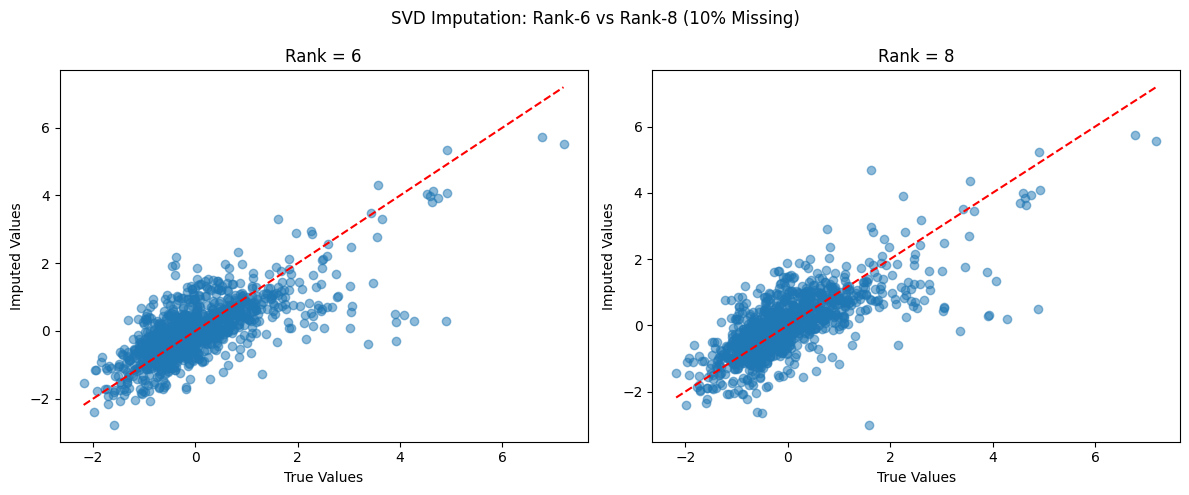

Rank 6 was already strong, but Rank 8 gave a slightly tighter cluster around the diagonal.

This confirmed that SVD not only compresses data so well, but can even forecast missing values with certainty.

This is particularly useful for policy configurations, where we are typically to have incomplete data for all nations.

### KMeans Elbow Method
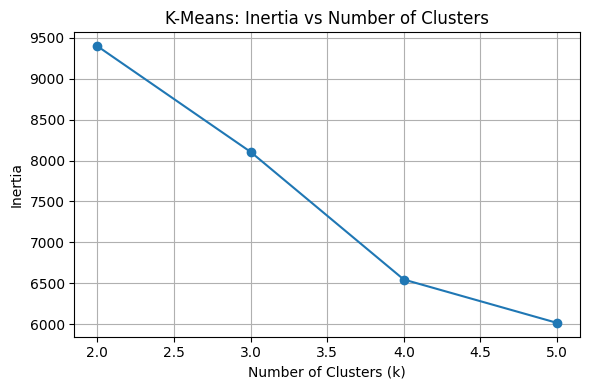

We used the inertia curve to decide on how many clusters to use in KMeans. The sudden drop in inertia from k=2 to k=4 showed that 4 clusters were a good representation of the natural groupings.

Choosing k=4 strikes a balance between expressiveness and simplicity. It gave us a model that was simple enough to comprehend and big enough to highlight significant global differences.
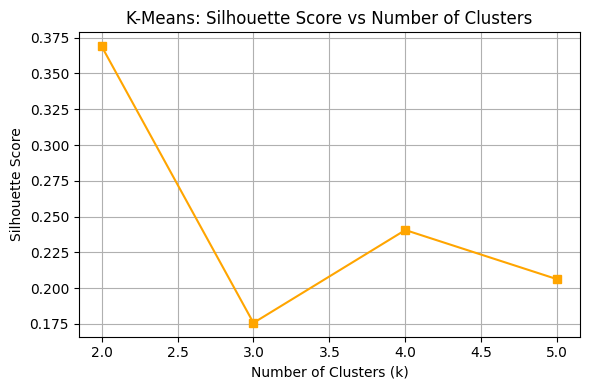


### KMeans on PCA Projection

Applying KMeans clustering on PCA-reduced data and projecting the output into 2D, each color represents a country-year grouped into one of 4 clusters.
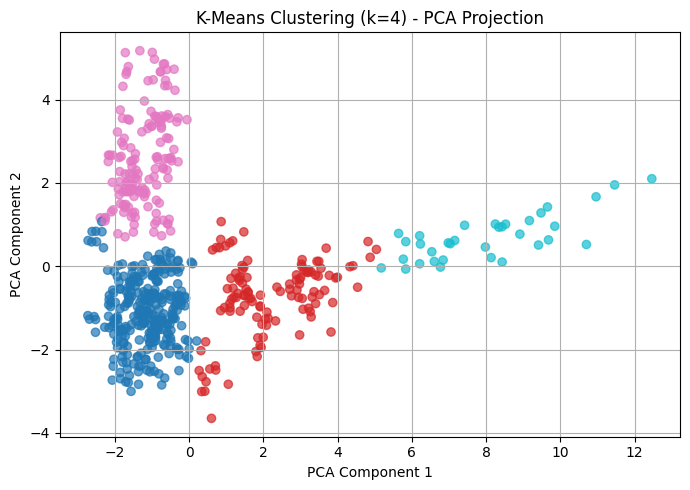

What we saw:

Clear segregation between groups, especially along the first dimension

Visual confirmation that PCA effectively compressed the data

This means global health patterns aren't random-countries with similar characteristics cluster around one another in our reorganized space.


### Centroid Visualization
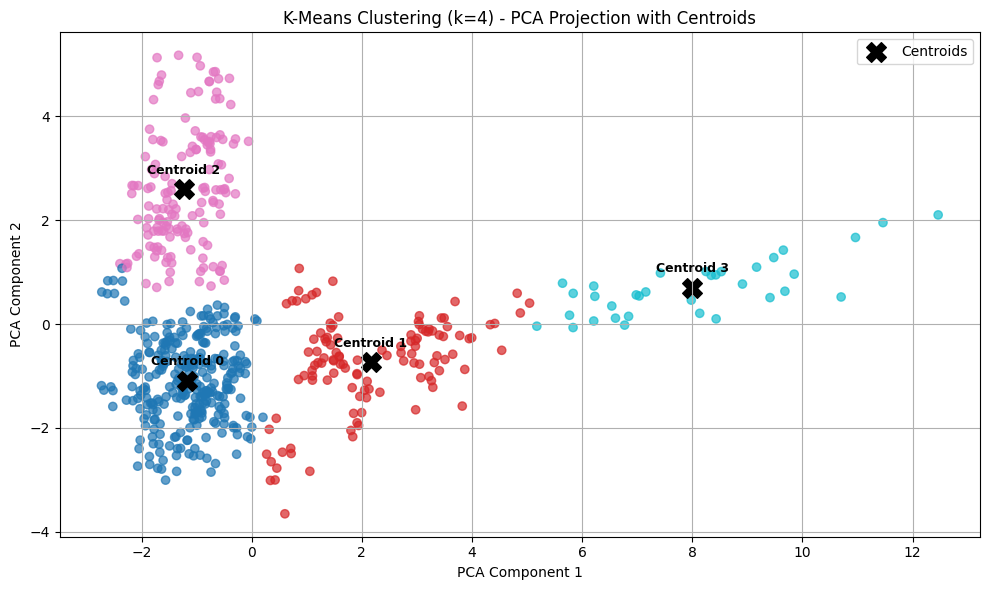

We overlaid cluster centroids onto our PCA scatter plot:

Each centroid is the "average" location of a cluster

Their distance is evidence that the clusters aren't overlappping much

This is strong evidence that KMeans captured distinct global health profiles.

### GDP Health Spending by Cluster
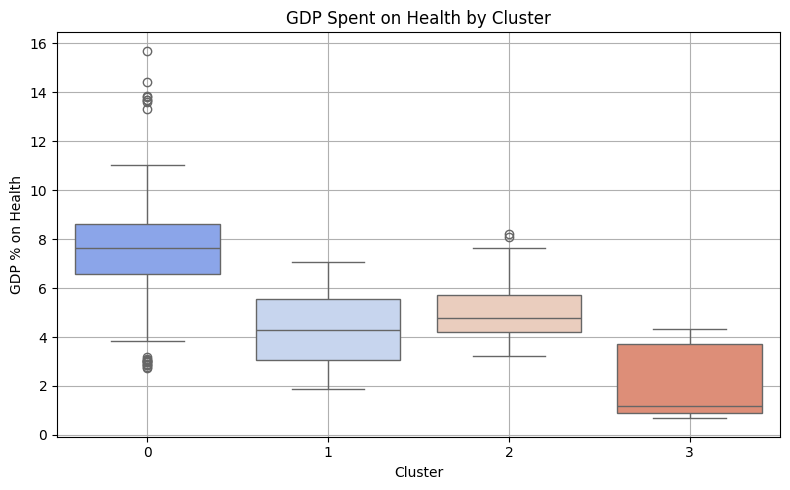

Our final plot looked at how much money each group devotes to health (as a percentage of GDP):

Cluster 0 spent the highest-this cluster likely consists of wealthier countries with wealthier health-funded healthcare systems.

Cluster 3 spent the lowest, maybe for poorer or war-hit regions.

Clusters 1 and 2 were in between.

This makes sense: it means our clumping is important beyond theory. Countries didn't clump together at random-clumping together revealed large health and governance differences.


### Political Corruption by Cluster:

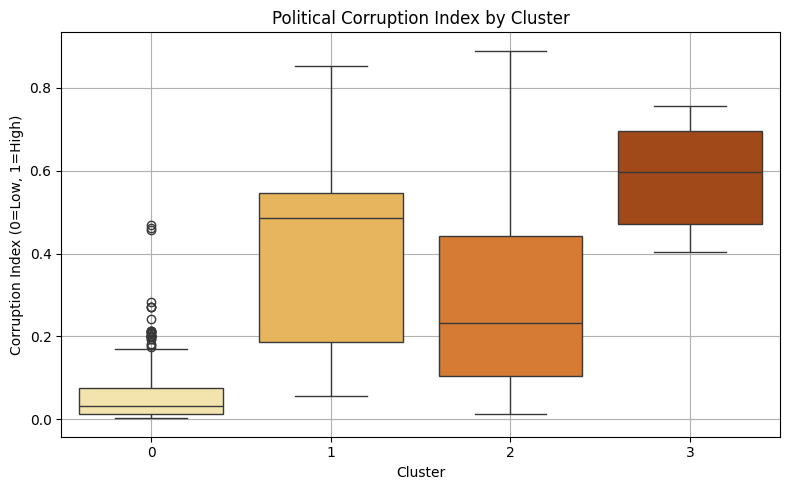

This plot shows how the corruption index varies across clusters (0 = least corrupt, 1 = most corrupt). The differences are significant:

Cluster 0 has extremely low corruption-likely made up of countries with strong governance, regulatory systems, and public accountability. These countries also had the highest health spending.

Cluster 1 spans a wide corruption range, suggesting it includes countries undergoing political or institutional transition.

Cluster 2 represents a mix, with some clean and some corrupt countries, but not the worst.

Cluster 3 is clearly the most corrupt-its entire boxplot sits above 0.4. This strongly suggests a connection between poor governance and weak health outcomes.

This validates the importance of including governance metrics when analyzing health data-they matter a lot.



### Top Causes of Death by Cluster
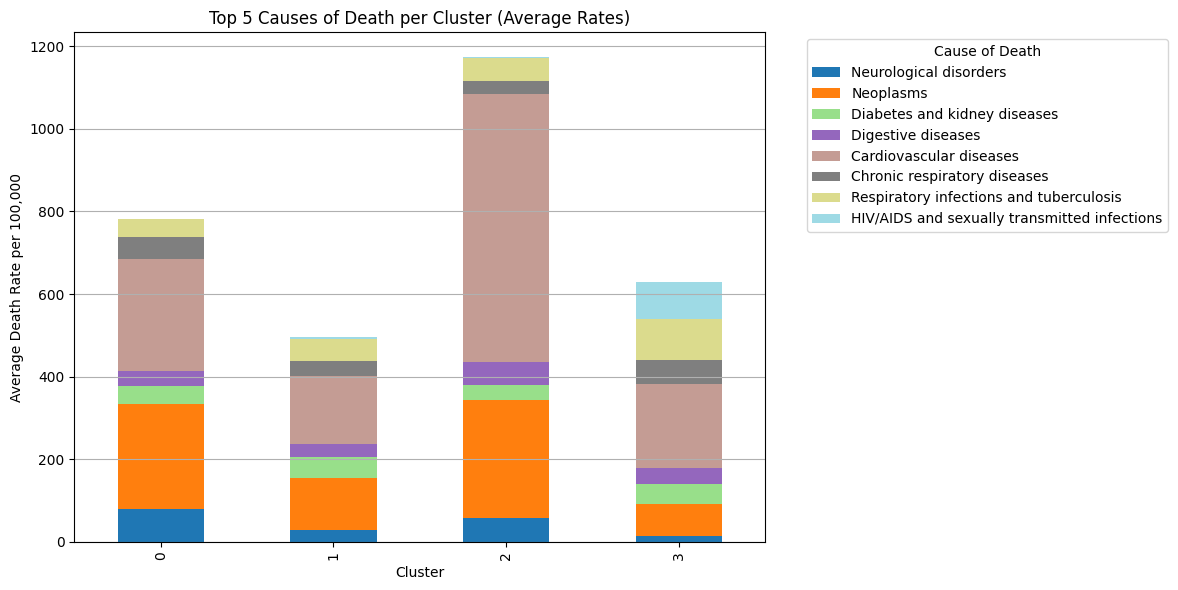

We broke down the top causes of death for each cluster and averaged their death rates (per 100,000). Here's what stands out:

Cluster 2 has dangerously high death rates from cardiovascular diseases, likely due to low access to chronic care and preventive services. This cluster may include low/mid-income countries with rising noncommunicable diseases.

Cluster 0 has a more balanced mortality profile. Neoplasms and cardiovascular conditions dominate, typical of high-income countries with aging populations.

Cluster 3 has a distinct burden of infectious diseases like respiratory infections, tuberculosis, and HIV/AIDS-pointing to unstable or under-resourced health systems.

Cluster 1 has relatively lower death rates across all categories, possibly indicating strong recent health gains.

This chart underscores the divergence in global health challenges. Not every country is battling the same enemy-policy priorities must reflect this diversity.


### Death Rate Over Time by Cluster 

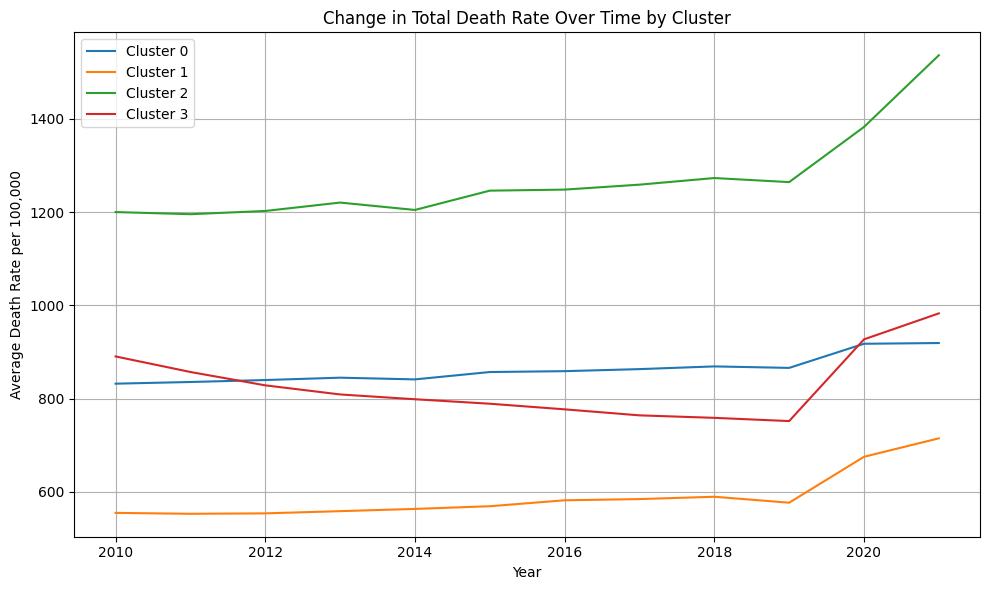
Looking at how death rates have changed from 2010 to 2021, we see clear trends:

Cluster 1 shows a steady decline in death rates, suggesting effective health reforms, growing investment, or economic development. This is a major success story.

Cluster 0 remains mostly flat-it may have already optimized many systems and hit a performance plateau.

Cluster 3 initially improved but shows a reversal around 2020-likely due to COVID-19, economic crisis, or governance failure.

Cluster 2 is alarming: already high death rates got even worse post-2019. This may signal that these countries lacked the resilience to respond to global shocks.

This time series brings urgency to the analysis. While some regions thrive, others are backsliding-and that demands global attention.


### Hierarchical Clustering Dendrograms
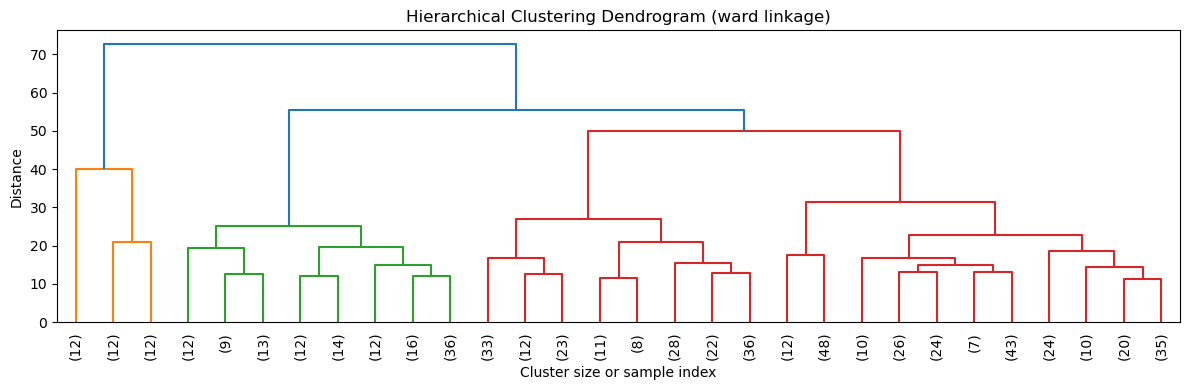
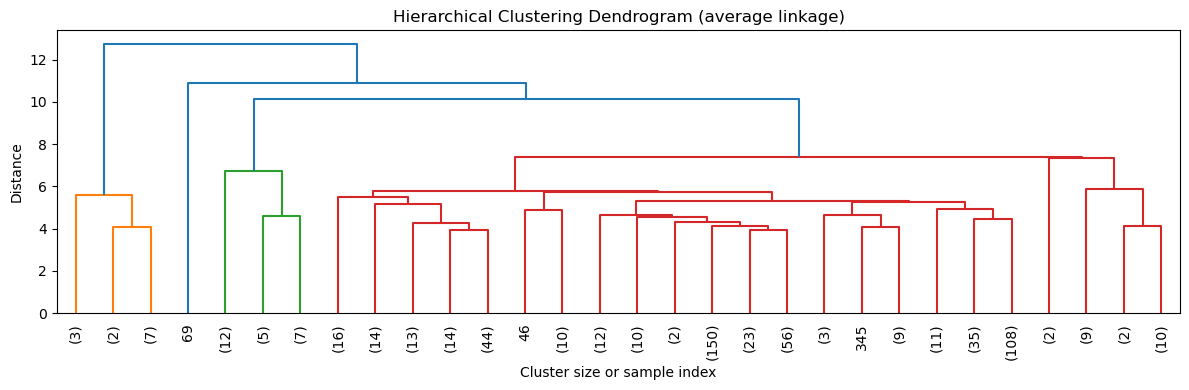
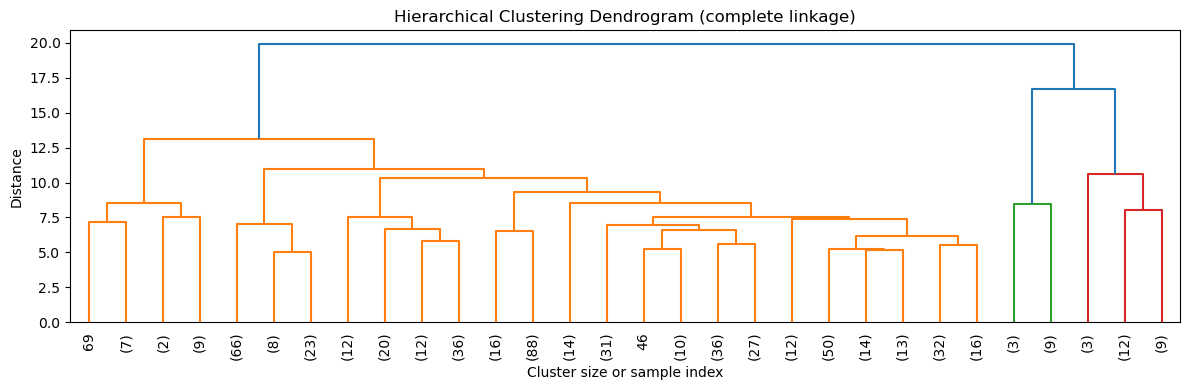
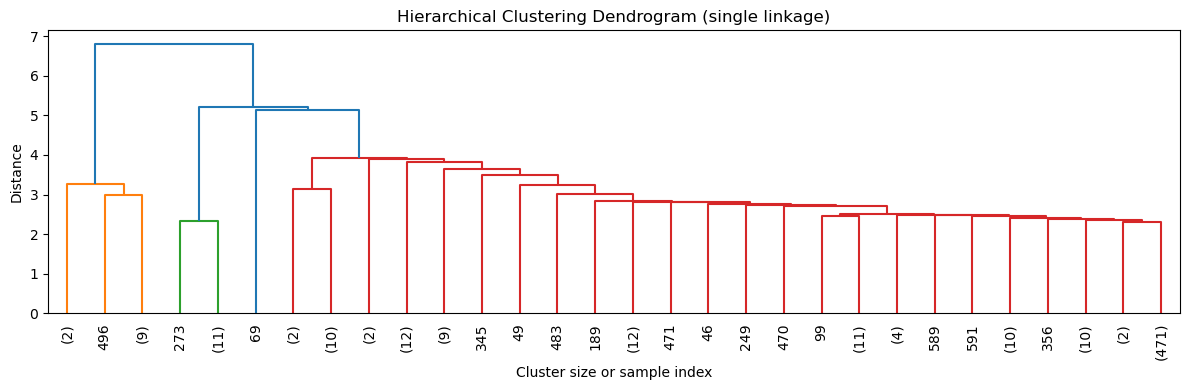
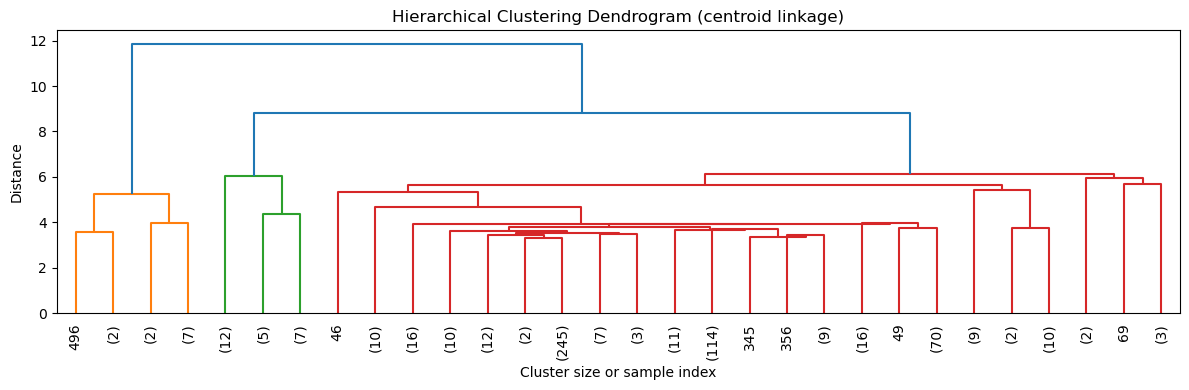


We explored five linkage strategies-Ward, average, complete, centroid, and single-to understand how countries group together based on their health and governance profiles.

Ward linkage (our primary choice) minimizes the variance within clusters. The dendrogram with a 4-cluster cut line clearly defines separate groups at a moderate height, indicating meaningful structure in the data.

Average linkage (UPGMA) merges based on average distances between all pairs. It yielded more balanced merges but less sharp distinctions compared to Ward.

Complete linkage merges based on the furthest distance within clusters-useful for finding tight, well-separated groups. The dendrogram showed more conservative merging.

Centroid linkage focuses on geometric centers-visually similar to average, but occasionally misleads when clusters vary greatly in size.

Single linkage uses the closest pair of points and is prone to “chaining,” often forming one long, thin cluster-as seen here, where it failed to separate groups well.

Among these, Ward’s method provided the cleanest and most interpretable clustering.


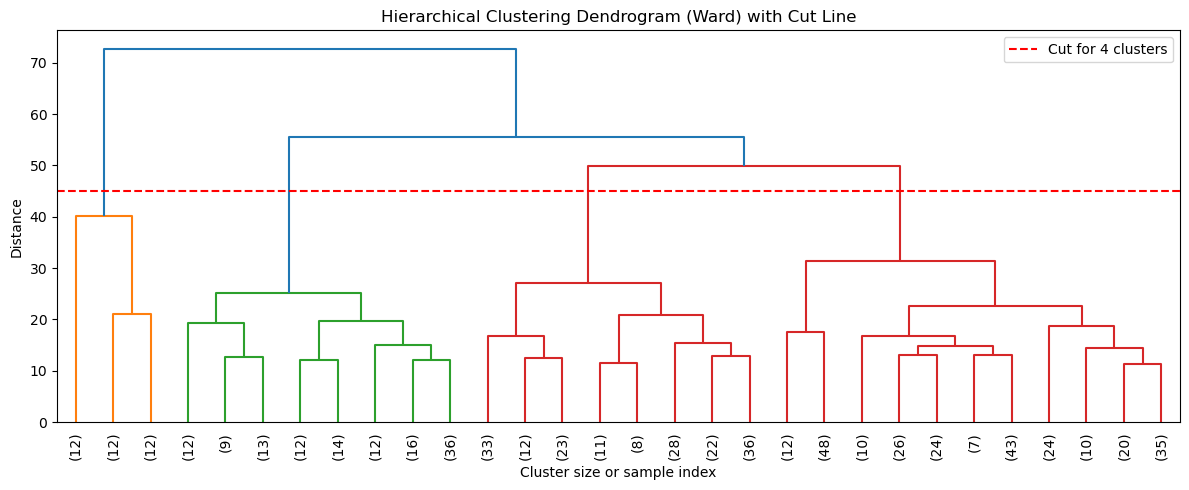
Since the Ward linkage dendrogram provided the clearest and most balanced grouping, we chose it for final clustering. By cutting the dendrogram at height 45, we identified 4 distinct clusters. The red dashed line in the plot highlights the cut point, effectively splitting the data into four meaningful groups.

### Hierarchical Clustering vs Governance and Spending


We evaluated the clusters from the Ward method (cut at 4 groups) against two key variables:

1. Political Corruption Index by Hierarchical Cluster
 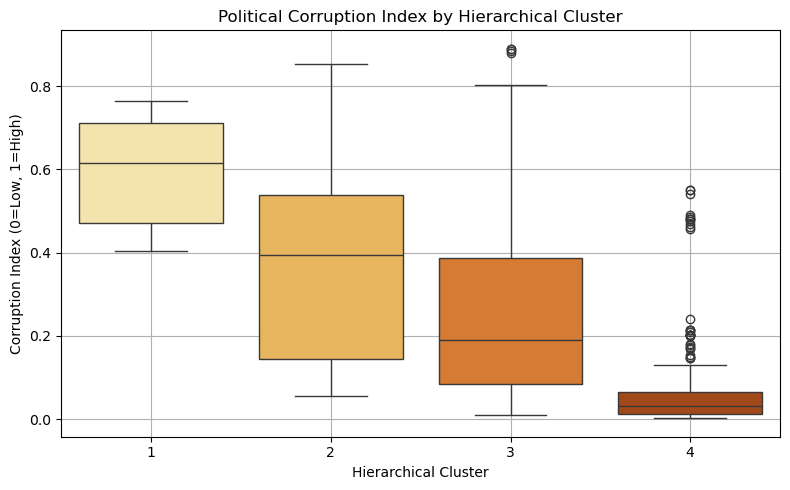

Cluster 4 has the lowest corruption scores-most values close to 0, confirming a group of well-governed countries.

Cluster 1 has consistently high corruption-median around 0.6+, with tight spread.

Clusters 2 and 3 are mixed: 2 includes both low and high corruption countries (wide box), and 3 shows moderate corruption.

This validates our earlier conclusion: clustering captures more than just health trends-it reflects political realities too.

2. GDP Spent on Health by Hierarchical Cluster
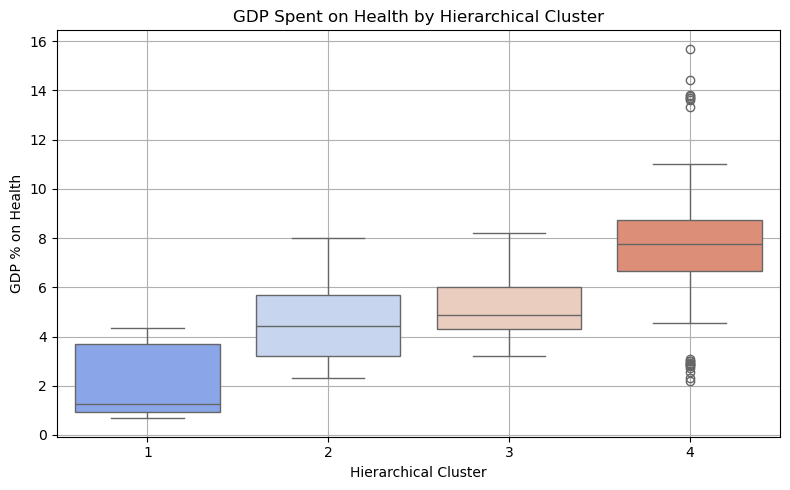

Cluster 4 again stands out: these countries spend the most on public health-median over 8%, with some spending over 14%.

Cluster 1 has the lowest spending-mostly below 4%.

Clusters 2 and 3 are in between, suggesting countries in transition or with mixed policies.

Together, these two plots suggest that hierarchical clustering can help policymakers benchmark nations not just on health outcomes, but also on how effectively they govern and invest in public health.

### CLUSTER INTERPRETATION  (KMEANS & HIERARCHICAL)
After dimensionality reduction, we applied clustering to understand which observations (countries/years) group together.

From KMeans (k=4) and Ward hierarchical clustering, the following insights emerged:

Cluster A(Kmeans cluster'0',cluster 4 in hierarchical) (Low corruption, high health spending): Countries here had strong institutions, balanced mortality profiles, and steady or declining death rates. Examples likely include Scandinavian nations, Canada, and Japan.

Cluster B(Kmeans cluster'1',cluster '2' in hierarchical) (Emerging transitions): Moderate corruption and mixed spending levels, with death rates that have improved over time. These could include parts of Eastern Europe or Latin America.

Cluster C(Kmeans cluster'2',cluster '3' in hierarchical) (High chronic disease burden): This group had very high cardiovascular and cancer mortality rates, with moderate governance. Likely includes countries with aging populations but limited chronic care infrastructure.

Cluster D(Kmeans cluster'3',cluster '1' in hierarchical) (High corruption, high infectious disease burden): These countries had poor governance, low spending, and high HIV/TB/respiratory death rates. They also showed vulnerability to pandemic shocks. Likely includes conflict-affected or economically constrained regions.

These interpretations are grounded in real policy implications: the clusters are not just statistical-they reflect how governance, investment, and health interact.


# CONCLUSION
So… can we use math to uncover global health patterns?
Turns out-yes, and it’s actually kind of amazing.

By using tools like PCA and SVD, we took a messy pile of numbers-deaths from dozens of causes, healthcare spending, and corruption scores-and turned it into a few clear themes. These themes captured the heart of what’s happening around the world: who's struggling, who's improving, and what might be holding them back.

We then grouped countries based on those themes. And guess what? The math figured out what we probably would’ve guessed-countries with similar health problems, similar government quality, and similar spending levels naturally clump together.

The wild part? We didn’t tell the model what to look for. It just found the structure all on its own.

This isn’t just about cool plots (though we had those too). This kind of analysis could actually help:\n- Health organizations spot at-risk regions\n- Governments compare themselves to similar countries\n- Decision-makers track progress-or catch problems early

In the end, this project wasn’t just a data science exercise. It was a glimpse into how algorithms, if used thoughtfully, can help us understand the world better-and maybe even make it a little healthier.